# 问题定义

问题：通过集成学习方法预测用户是否会购买促销品，属于二元分类问题。所以这个练习的目的是通过集成学习找到最佳的模型。

集成学习模型是将多种同质或者异质的模型集成组合在一起，来形成更优的模型。而在这个过程的目标就是，减少机器学习模型的方差和偏差，找到机器学习模型在欠拟合和过拟合之间的最佳平衡点。


# 数据预处理

In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
df_fission = pd.read_csv('易速鲜花裂变转化.csv') #载入数据
print('用户数:', df_fission.count()['用户码']) #查看数据条目数
df_fission #显示头几行数据

用户数: 10000


,用户码,性别,年龄,城市,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,裂变方案,是否转化
0,1,女,40,杭州,9,2,1,516,6360.66,0.0000,疯狂打折,0
1,2,男,69,杭州,6,2,1,682,28605.00,0.0000,疯狂打折,0
2,3,女,32,杭州,9,1,1,803,10378.09,236311.0932,买一送一,1
3,4,女,37,苏州,0,2,1,778,25564.01,129909.8079,买一送一,1
4,5,男,55,苏州,4,3,0,547,3235.61,136976.1948,买一送一,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,男,49,扬州,7,2,1,746,1930.44,0.0000,疯狂打折,0
9996,9997,男,36,杭州,1,1,0,569,29593.82,82517.8587,买一送一,0
9997,9998,女,55,扬州,7,1,0,850,32841.84,0.0000,疯狂打折,1
9998,9999,男,35,扬州,5,1,1,529,21564.34,117800.7531,买一送一,0


这个数据集中共有10000个数据样本，即包含了10000个用户的信息。

除了其他字段外，我们重点关注`“裂变方案”`字段。该字段表示用户被导流到的裂变类型，即用户可能看到`“疯狂打折”`优惠页或者`“买一送一”`优惠页，这是随机分配的结果。对于每个用户而言，只能属于其中之一。与此相对应的`“是否转化”`字段则用来预测转化率。

我们还需要把数据集中的类别变量，转变为机器学习模型能够读取的虚拟变量（也叫哑编码或哑变量）

In [2]:
# 把二元类别文本数字化
df_fission['性别'].replace("女",0,inplace = True)
df_fission['性别'].replace("男",1,inplace=True)
# 显示数字类别
print("Gender unique values",df_fission['性别'].unique())
# 把多元类别转换成多个二元哑变量，然后贴回原始数据集
df_fission = pd.get_dummies(df_fission, drop_first = True)
# df_fission = [df_fission, d_city]
# df_fission = pd.concat(df_bank, axis = 1)
# 构建特征和标签集合
# y = df_fission['Exited']
# X = df_fission.drop(['Name', 'Exited', 'City'], axis=1)
# X.head() #显示新的特征集
df_fission

Gender unique values [0 1]


,用户码,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,是否转化,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,1,0,40,9,2,1,516,6360.66,0.0000,0,1,0,1
1,2,1,69,6,2,1,682,28605.00,0.0000,0,1,0,1
2,3,0,32,9,1,1,803,10378.09,236311.0932,1,1,0,0
3,4,0,37,0,2,1,778,25564.01,129909.8079,1,0,1,0
4,5,1,55,4,3,0,547,3235.61,136976.1948,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,49,7,2,1,746,1930.44,0.0000,0,0,0,1
9996,9997,1,36,1,1,0,569,29593.82,82517.8587,0,1,0,0
9997,9998,0,55,7,1,0,850,32841.84,0.0000,1,0,0,1
9998,9999,1,35,5,1,1,529,21564.34,117800.7531,0,0,0,0


这段代码的目的是对一个名为df_fission的数据集进行预处理，以便之后进行机器学习。具体步骤如下：

1. 将文本数据数字化：在这里，性别列包含两个类别（女和男），代码将其替换为0和1，以方便机器更轻松地理解和处理这些数据。

```python
df_fission['性别'].replace("女",0,inplace = True)
df_fission['性别'].replace("男",1,inplace=True)
```

2. 显示替换后的性别列的唯一值（0和1）。

```python
print("Gender unique values", df_fission['性别'].unique())
```

3. 将多元分类特征转换为多个二元哑变量(one-hot encoding)。这是一种常用的处理分类数据的方法，可以将一个具有多个类别的特征列转换为多个二元特征列，每个新列表示原始特征的一个类别。

```python
df_fission = pd.get_dummies(df_fission, drop_first = True)
```

这里的`drop_first=True`表示在创建哑变量时删除第一个类别，以减少多重共线性问题。

4. 代码的以下部分被注释掉了，但其目的是构建特征集（X）和标签集（y）以进行机器学习模型训练。特征集是训练模型所需的输入数据（例如，客户的性别、年龄、收入等），而标签集是我们要预测的目标值（例如，客户是否流失）。

```python
# y = df_fission['Exited']
# X = df_fission.drop(['Name', 'Exited', 'City'], axis=1)
# X.head() #显示新的特征集
```

最后，代码显示了处理后的数据集df_fission。经过上述处理，该数据集已准备好用于机器学习模型的训练和测试。

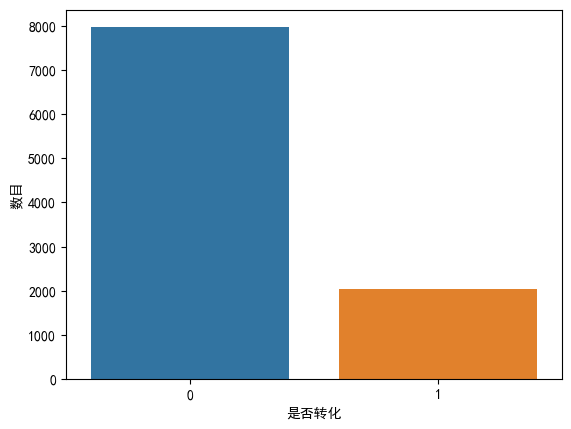

In [3]:
import matplotlib.pyplot as plt #导入pyplot模块
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns #导入Seaborn
fig = sns.countplot(x='是否转化', data=df_fission) #创建柱状计数图
# fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #X轴标签倾斜
fig.set_ylabel("数目") #Y轴标题
plt.show() #显示图像

这段代码的目的是使用Seaborn库对名为df_fission的数据集中的"是否转化"列进行可视化，以绘制柱状计数图。Seaborn是一个基于matplotlib的Python数据可视化库，它提供了更高级别的接口和更漂亮的默认样式。

以下是代码的逐行解释：

1. 导入matplotlib中的pyplot模块和Seaborn库。

```python
import matplotlib.pyplot as plt
import seaborn as sns
```

2. 使用Seaborn的`countplot()`函数创建柱状计数图，设置x轴为"是否转化"列，数据来源为df_fission数据集。

```python
fig = sns.countplot(x='是否转化', data=df_fission)
```

3. 为y轴设置标签，这里设置为"数目"。

```python
fig.set_ylabel("数目")
```

4. 使用`plt.show()`显示生成的柱状图。

```python
plt.show()
```

经过这些步骤，你会看到一个展示"是否转化"列中各类别计数的柱状图。这有助于我们了解数据分布情况，为选择和调整机器学习模型提供参考。

# 特征工程和拆分数据集

In [4]:
# df_fission = df_fission.query("裂变类型 == '助力砍价'")

In [5]:
X = df_fission.drop(['用户码','是否转化'], axis = 1) # 构建特征集
y = df_fission.是否转化.values # 构建标签集

这两行代码的目的是为了从原始的df_fission数据集中提取特征（自变量）和标签（因变量），以便进行机器学习模型的训练。

以下是逐行解释：

1. 从df_fission数据集中删除'用户码'和'是否转化'这两列，因为'用户码'可能对模型预测没有实际影响，而'是否转化'是我们希望预测的目标。我们使用`drop()`方法删除这两列，并设置`axis=1`表示操作在列上进行。把结果赋值给变量X，这就是我们的特征集。

```python
X = df_fission.drop(['用户码', '是否转化'], axis=1)
```

2. 提取df_fission数据集中的'是否转化'列作为我们的标签集。我们希望根据特征集X中的数据预测这一列的值。将结果存储在变量y中。

```python
y = df_fission.是否转化.values
```

现在，我们得到了特征集X和标签集y，可以用它们来训练和评估机器学习模型。这对于划分数据集为训练集和测试集以及选择合适的模型和参数进行建模等后续操作非常有帮助。

In [6]:
X

,性别,年龄,入会月数,会员类型,活跃用户,会员积分,总消费,年收入,城市_杭州,城市_苏州,裂变方案_疯狂打折
0,0,40,9,2,1,516,6360.66,0.0000,1,0,1
1,1,69,6,2,1,682,28605.00,0.0000,1,0,1
2,0,32,9,1,1,803,10378.09,236311.0932,1,0,0
3,0,37,0,2,1,778,25564.01,129909.8079,0,1,0
4,1,55,4,3,0,547,3235.61,136976.1948,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,49,7,2,1,746,1930.44,0.0000,0,0,1
9996,1,36,1,1,0,569,29593.82,82517.8587,1,0,0
9997,0,55,7,1,0,850,32841.84,0.0000,0,0,1
9998,1,35,5,1,1,529,21564.34,117800.7531,0,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

这段代码用于将数据集划分为训练集和测试集，以便对机器学习模型进行训练和评估。这是一个很常见的步骤，为了能够客观地评估模型在未知数据上的表现。以下是逐行解释：

1. 导入`sklearn.model_selection`模块中的`train_test_split`函数。

```python
from sklearn.model_selection import train_test_split
```

2. 使用`train_test_split`函数将特征集X和标签集y划分为训练集和测试集。测试集的大小为原始数据集的20%（通过设置`test_size = 0.2`指定），剩余80%作为训练集。`random_state`参数确保每次运行代码时，数据集的划分方式是一致的。

```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```

现在，我们已经将特征集X和标签集y成功划分为训练集和测试集（X_train, y_train和X_test, y_test）。接下来，我们可以使用训练集（X_train和y_train）来训练一个机器学习模型，然后基于测试集（X_test和y_test）评估模型的性能。这有助于我们调整模型参数，以获得更好的预测结果。

In [8]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test = scaler.transform(X_test) #转换测试集数据

这部分代码的目的是对特征数据进行归一化处理。归一化是预处理数据的一种常见方法，它可以将不同范围和单位的特征值转换到相同的尺度上，从而避免某些特征由于数值范围较大而在模型训练中占据主导地位。归一化有助于提高模型的性能。

逐行解释：

1. 从`sklearn.preprocessing`模块导入`MinMaxScaler`类。`MinMaxScaler`是一种将特征值缩放到指定范围（默认为0到1）的方法。

```python
from sklearn.preprocessing import MinMaxScaler
```

2. 创建一个`MinMaxScaler`对象，命名为`scaler`。

```python
scaler = MinMaxScaler()
```

3. 使用`scaler`对象的`fit_transform()`方法对训练集特征数据`X_train`进行拟合并执行归一化转换。将得到的新数据替换原来的`X_train`。

```python
X_train = scaler.fit_transform(X_train)
```

4. 使用`scaler`对象的`transform()`方法对测试集特征数据`X_test`进行归一化转换。这里只用到`transform()`方法，因为我们已经在训练集上拟合了缩放器，测试集中的数据需要基于相同的缩放标准进行归一化。

```python
X_test = scaler.transform(X_test)
```

现在，训练集和测试集的特征数据都进行了归一化处理。接下来，我们可以选择合适的机器学习算法，使用处理后的数据对模型进行训练和评估。

In [9]:
X_train

array([[0.        , 0.37837838, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.27027027, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.28378378, 0.7       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.68918919, 0.9       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.13513514, 0.9       , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.10810811, 0.7       , ..., 0.        , 1.        ,
        0.        ]])

# 训练模型

## 定义混淆矩阵函数


In [10]:
from sklearn.metrics import confusion_matrix # 导入混淆矩阵
import seaborn as sns #导入seaborn画图工具箱
def show_matrix(y_test, y_pred): # 定义一个函数显示混淆矩阵
    cm = confusion_matrix(y_test,y_pred) # 调用混淆矩阵
    plt.title("混淆矩阵") # 标题
    sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False) # 热力图设定
    plt.show() # 显示混淆矩阵

这段代码定义了一个名为`show_matrix`的函数，用于根据模型预测的结果（`y_pred`）和真实标签（`y_test`）计算并显示混淆矩阵。混淆矩阵是一种用于评估分类模型性能的可视化工具，它展示了模型在各个类别上的预测正确和错误数量。

逐行解释：

1. 从`sklearn.metrics`模块导入`confusion_matrix`函数，用于计算混淆矩阵。

```python
from sklearn.metrics import confusion_matrix
```

2. 导入`seaborn`库，这是一个基于`matplotlib`的绘图库，常用于绘制统计图形。

```python
import seaborn as sns
```

3. 定义一个名为`show_matrix`的函数，接受两个参数：`y_test`（真实标签）和`y_pred`（模型预测标签）。

```python
def show_matrix(y_test, y_pred):
```

4. 使用`confusion_matrix`函数计算混淆矩阵，将结果存储在变量`cm`中。

```python
    cm = confusion_matrix(y_test, y_pred)
```

5. 设置热力图的标题为"混淆矩阵"。

```python
    plt.title("混淆矩阵")
```

6. 使用`seaborn`库的`heatmap`函数绘制混淆矩阵热力图。设置为蓝色调（`cmap="Blues"`），在热力图中显示具体的矩阵值（`annot=True`），设置数值格式为整数（`fmt="d"`），并隐藏颜色条（`cbar=False`）。

```python
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
```

7. 最后，使用`plt.show()`函数显示绘制的混淆矩阵热力图。

```python
    plt.show()
```

现在，我们可以使用这个`show_matrix`函数来绘制自己的机器学习模型在未知数据（即测试集）上的预测结果，从而评估模型在每个类别上的分类性能。

## 使用Bagging 方法

Bagging 算法的基本思想是从原始的数据集中抽取数据，形成 K 个随机的新训练集，然后训练出 K 个不同的模型。

Bagging算法的具体步骤如下：首先，从原始样本集中随机抽取K轮，每轮抽取n个训练样本作为一个训练集。这种抽取方式是有放回的，即同一个样本可能被多次抽取，也可能一次都没有被抽到。这个过程称为bootstrap（可译为“自举”或“自助采样”）。经过K轮抽取后，就会得到K个独立的训练集。

接着，在每个训练集上使用相同的机器学习算法（如决策树、神经网络等）进行模型训练。由于有K个训练集，因此可以得到K个模型。这些模型被称为“基模型”（base estimator）或者“基学习器”。

最后，对于这 K 个模型，Bagging 算法会以不同的方式得到基模型的集成结果：对于分类问题，Bagging 算法会进行投票来获得分类结果；而对于回归问题，则是计算 K 个模型的均值，并将其作为最终结果。

### 决策树的 Bagging

 决策树测试准确率: 84.85%
 决策树测试F1 分数: 54.98%
 决策树Bagging 测试准确率: 84.75%
 决策树Bagging 测试F1 分数: 55.73%


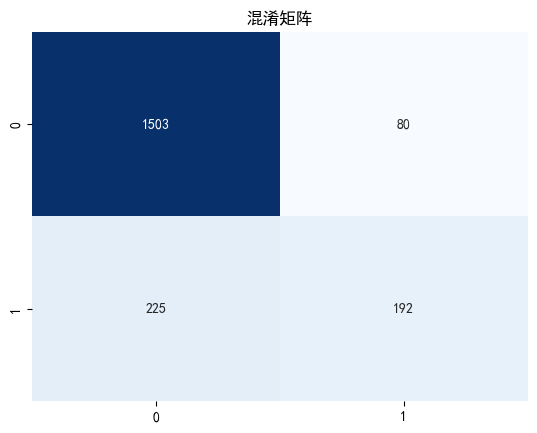

In [11]:
# 对多棵决策树进行聚合(Bagging)
from sklearn.ensemble import BaggingClassifier # 导入Bagging 分类器
from sklearn.tree import DecisionTreeClassifier # 导入决策树分类器
from sklearn.metrics import (f1_score, confusion_matrix) # 导入评估指标
dt = BaggingClassifier(DecisionTreeClassifier()) # 只使用一棵决策树
dt.fit(X_train, y_train) # 拟合模型
y_pred = dt.predict(X_test) # 进行预测
print(" 决策树测试准确率: {:.2f}%".format(dt.score(X_test, y_test)*100))
print(" 决策树测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
bdt = BaggingClassifier(DecisionTreeClassifier()) # 树的Bagging
bdt.fit(X_train, y_train) # 拟合模型
y_pred = bdt.predict(X_test) # 进行预测
print(" 决策树Bagging 测试准确率: {:.2f}%".format(bdt.score(X_test, y_test)*100))
print(" 决策树Bagging 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_bdt = f1_score(y_test, y_pred)*100

这段代码主要介绍了如何使用`BaggingClassifier`对单棵决策树模型进行集成学习方法（即Bagging），以提高模型在测试数据上的性能。

逐行解释：

1-2. 分别导入`BaggingClassifier`和`DecisionTreeClassifier`类，用来实现Bagging集成学习。

```python
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
```

3. 导入评估指标`f1_score`和`confusion_matrix`。

```python
from sklearn.metrics import (f1_score, confusion_matrix)
```

4. 创建一个单独的决策树分类器，这里使用`BaggingClassifier(DecisionTreeClassifier())`，传入单独的`DecisionTreeClassifier`实例。

```python
dt = BaggingClassifier(DecisionTreeClassifier())
```

5. 使用训练集数据拟合决策树模型。

```python
dt.fit(X_train, y_train)
```

6. 使用模型对测试集数据进行预测。

```python
y_pred = dt.predict(X_test)
```

7-8. 计算并打印决策树模型在测试集上的准确率和F1分数。

```python
print(" 决策树测试准确率: {:.2f}%".format(dt.score(X_test, y_test)*100))
print(" 决策树测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

9-10. 创建一个基于决策树的Bagging分类器，即聚合多棵决策树的预测结果。

```python
bdt = BaggingClassifier(DecisionTreeClassifier())
```

11. 使用训练集数据拟合决策树Bagging模型。

```python
bdt.fit(X_train, y_train)
```

12. 使用模型对测试集数据进行预测。

```python
y_pred = bdt.predict(X_test)
```

13-14. 计算并打印决策树Bagging模型在测试集上的准确率和F1分数。

```python
print(" 决策树Bagging 测试准确率: {:.2f}%".format(bdt.score(X_test, y_test)*100))
print(" 决策树Bagging 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

15. 调用之前定义的`show_matrix`函数，绘制该模型的混淆矩阵热力图。

```python
show_matrix(y_test, y_pred)
```

16. 计算决策树 Bagging 模型在测试集的 F1 分数，并乘以 100。

```python
f1_bdt = f1_score(y_test, y_pred)*100
```

通过对比单棵决策树和基于决策树的Bagging分类器的性能指标（准确率和F1分数），我们可以评估Bagging集成学习方法是否提高了模型在测试数据上的性能。

### 随机森林算法

 随机森林测试准确率: 86.25%
 随机森林测试F1 分数: 58.65%


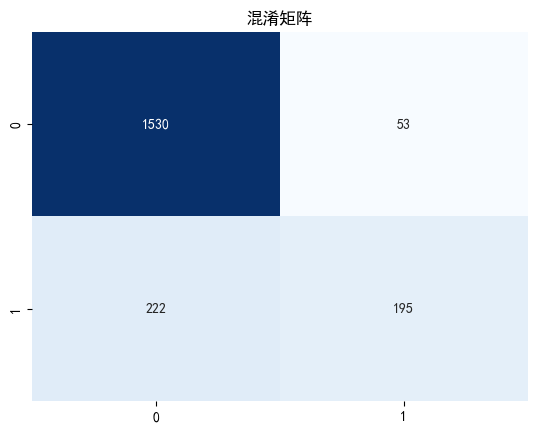

In [12]:
from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
rf = RandomForestClassifier() # 随机森林模型
rf.fit(X_train, y_train) # 拟合模型
y_pred = rf.predict(X_test) # 进行预测
print(" 随机森林测试准确率: {:.2f}%".format(rf.score(X_test, y_test)*100))
print(" 随机森林测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)*100

这段代码演示了如何使用`RandomForestClassifier`模型进行分类任务，并计算及展示测试集上的性能指标。

逐行解释：

1. 导入`GridSearchCV`工具，它是一个实用工具，用于搜索机器学习模型的最优超参数。

```python
from sklearn.model_selection import GridSearchCV
```

2. 导入`RandomForestClassifier`模型，它是一种基于多棵决策树的集成学习方法。

```python
from sklearn.ensemble import RandomForestClassifier
```

3. 创建一个`RandomForestClassifier`实例。

```python
rf = RandomForestClassifier()
```

4. 使用训练集数据拟合随机森林模型。

```python
rf.fit(X_train, y_train)
```

5. 使用模型对测试集数据进行预测。

```python
y_pred = rf.predict(X_test)
```

6-7. 计算并打印随机森林模型在测试集上的准确率和F1分数。

```python
print(" 随机森林测试准确率: {:.2f}%".format(rf.score(X_test, y_test)*100))
print(" 随机森林测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

8. 调用之前定义的`show_matrix`函数，绘制随机森林模型的混淆矩阵热力图。

```python
show_matrix(y_test, y_pred)
```

9. 计算随机森林模型在测试集的F1分数，并乘以100。

```python
f1_rf = f1_score(y_test, y_pred)*100
```

这段代码展示了如何使用`RandomForestClassifier`模型进行分类任务，并通过准确率和F1分数评估模型在测试集上的性能。另外，这里的代码没有使用`GridSearchCV`工具去搜索最优的超参数。如果需要使用`GridSearchCV`进行网格搜索优化，请参考以下代码示例：

```python
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [10, 20, 30]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
```

### 极端随机森林模型

 极端随机森林测试准确率: 85.15%
 极端随机森林测试F1 分数: 54.52%


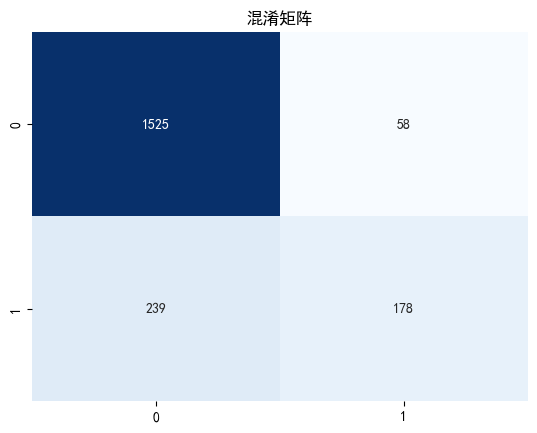

In [13]:
from sklearn.ensemble import ExtraTreesClassifier # 导入极端随机森林模型
ext = ExtraTreesClassifier() # 极端随机森林模型
ext.fit(X_train, y_train) # 拟合模型
y_pred = ext.predict(X_test) # 进行预测
print(" 极端随机森林测试准确率: {:.2f}%".format(ext.score(X_test, y_test)*100))
print(" 极端随机森林测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_ext = f1_score(y_test, y_pred)*100

这段代码演示了如何使用`ExtraTreesClassifier`模型（极端随机森林）进行分类任务，并计算及展示测试集上的性能指标。

逐行解释：

1. 导入`ExtraTreesClassifier`模型。极端随机森林（Extremely Randomized Trees）是一种基于随机森林的扩展，可以降低方差。

```python
from sklearn.ensemble import ExtraTreesClassifier
```

2. 创建一个`ExtraTreesClassifier`实例。

```python
ext = ExtraTreesClassifier()
```

3. 使用训练集数据拟合极端随机森林模型。

```python
ext.fit(X_train, y_train)
```

4. 使用模型对测试集数据进行预测。

```python
y_pred = ext.predict(X_test)
```

5-6. 计算并打印极端随机森林模型在测试集上的准确率和F1分数。

```python
print(" 极端随机森林测试准确率: {:.2f}%".format(ext.score(X_test, y_test)*100))
print(" 极端随机森林测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

7. 调用之前定义的`show_matrix`函数，绘制极端随机森林模型的混淆矩阵热力图。

```python
show_matrix(y_test, y_pred)
```

8. 计算极端随机森林模型在测试集的F1分数，并乘以100。

```python
f1_ext = f1_score(y_test, y_pred)*100
```

这段代码展示了如何使用`ExtraTreesClassifier`模型（极端随机森林）进行分类任务，以及如何通过准确率和F1分数评估模型在测试集上的性能。

## 使用 Boosting 算法

Boosting 方法是一种将梯度下降思想应用于机器学习算法优化的方法，通过逐步增强弱模型对数据的拟合能力。其基本思路是持续使用新模型来优化同一个基模型（即 Boosting 开始时的初始模型），当引入新的弱模型时，Boosting 会整合这个新模型到原有模型上，形成一个新的基模型。训练这个新基模型时，重点放在之前模型预测错误样本上以减小预测误差。

### AdaBoost 算法

AdaBoost 测试准确率: 79.80%
AdaBoost 测试F1 分数: 51.79%


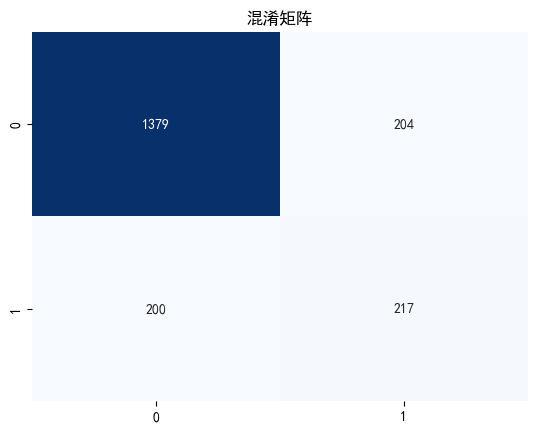

In [14]:
from sklearn.ensemble import AdaBoostClassifier # 导入AdaBoost 模型
dt = DecisionTreeClassifier() # 选择决策树分类器作为AdaBoost 的基准算法
ada = AdaBoostClassifier(dt) # AdaBoost 模型
ada.fit(X_train, y_train) # 拟合模型
y_pred = ada.predict(X_test) # 进行预测
print("AdaBoost 测试准确率: {:.2f}%".format(ada.score(X_test, y_test)*100))
print("AdaBoost 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_ada = f1_score(y_test, y_pred)*100

这段代码演示了如何使用`AdaBoostClassifier`模型进行分类任务，并计算及展示测试集上的性能指标。

逐行解释：

1. 导入`AdaBoostClassifier`模型。AdaBoost（Adaptive Boosting）是一种自适应的迭代式集成学习方法。

```python
from sklearn.ensemble import AdaBoostClassifier
```

2. 导入`DecisionTreeClassifier`并创建一个实例。这里选择决策树分类器作为AdaBoost的基准算法。

```python
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
```

3. 创建一个`AdaBoostClassifier`实例，并将决策树分类器（`dt`）传入作为基准算法。

```python
ada = AdaBoostClassifier(dt)
```

4. 使用训练集数据拟合AdaBoost模型。

```python
ada.fit(X_train, y_train)
```

5. 使用模型对测试集数据进行预测。

```python
y_pred = ada.predict(X_test)
```

6-7. 计算并打印AdaBoost模型在测试集上的准确率和F1分数。

```python
print("AdaBoost 测试准确率: {:.2f}%".format(ada.score(X_test, y_test)*100))
print("AdaBoost 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

8. 调用之前定义的`show_matrix`函数，绘制AdaBoost模型的混淆矩阵热力图。

```python
show_matrix(y_test, y_pred)
```

9. 计算AdaBoost模型在测试集的F1分数，并乘以100。

```python
f1_ada = f1_score(y_test, y_pred)*100
```

这段代码展示了如何使用`AdaBoostClassifier`模型进行分类任务，以及如何通过准确率和F1分数评估模型在测试集上的性能。

### 使用GBDT算法

 梯度提升测试准确率: 86.60%
 梯度提升测试F1 分数: 59.64%


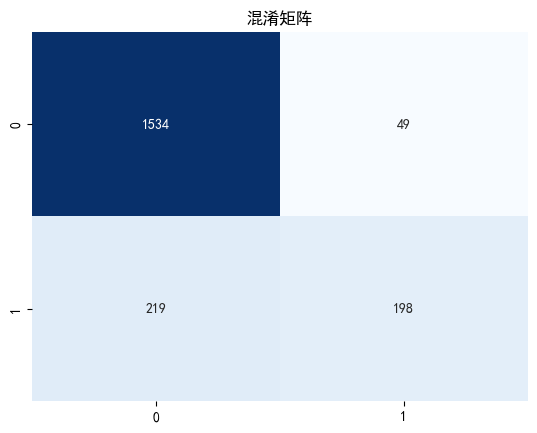

In [15]:
from sklearn.ensemble import GradientBoostingClassifier # 导入梯度提升模型
gb = GradientBoostingClassifier() # 梯度提升模型
gb.fit(X_train, y_train) # 拟合模型
y_pred = gb.predict(X_test) # 进行预测
print(" 梯度提升测试准确率: {:.2f}%".format(gb.score(X_test, y_test)*100))
print(" 梯度提升测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)*100

这段代码演示了如何使用`GradientBoostingClassifier`模型（梯度提升）进行分类任务，并计算及展示测试集上的性能指标。

逐行解释：

1. 导入`GradientBoostingClassifier`模型。梯度提升（Gradient Boosting）是一种集成学习方法，通过迭代地添加决策树来改善模型性能。

```python
from sklearn.ensemble import GradientBoostingClassifier
```

2. 创建一个`GradientBoostingClassifier`实例。

```python
gb = GradientBoostingClassifier()
```

3. 使用训练集数据拟合梯度提升模型。

```python
gb.fit(X_train, y_train)
```

4. 使用模型对测试集数据进行预测。

```python
y_pred = gb.predict(X_test)
```

5-6. 计算并打印梯度提升模型在测试集上的准确率和F1分数。

```python
print(" 梯度提升测试准确率: {:.2f}%".format(gb.score(X_test, y_test)*100))
print(" 梯度提升测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

7. 调用之前定义的`show_matrix`函数，绘制梯度提升模型的混淆矩阵热力图。

```python
show_matrix(y_test, y_pred)
```

8. 计算梯度提升模型在测试集的F1分数，并乘以100。

```python
f1_gb = f1_score(y_test, y_pred)*100
```

这段代码展示了如何使用`GradientBoostingClassifier`模型进行分类任务，以及如何通过准确率和F1分数评估模型在测试集上的性能。

### 使用XGB算法

XGB 测试准确率: 85.45%
XGB 测试F1 分数: 58.84%


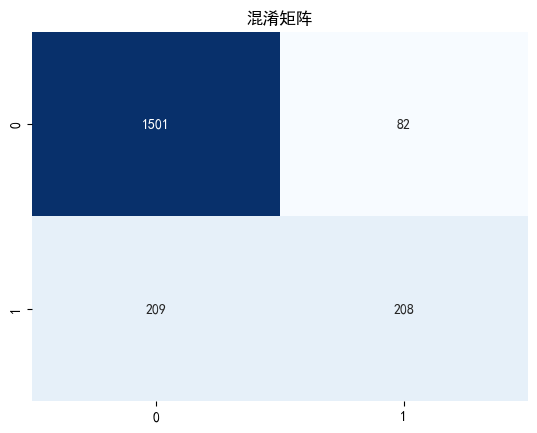

In [16]:
from xgboost import XGBClassifier # 导入XGB 模型
xgb = XGBClassifier() # XGB 模型
xgb.fit(X_train, y_train) # 拟合模型
y_pred = xgb.predict(X_test) # 进行预测
print("XGB 测试准确率: {:.2f}%".format(xgb.score(X_test, y_test)*100))
print("XGB 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
show_matrix(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred)*100

这段代码演示了如何使用`XGBClassifier`模型（XGBoost，极限梯度提升）进行分类任务，并计算及展示测试集上的性能指标。

逐行解释：

1. 导入`XGBClassifier`模型。XGBoost（极限梯度提升）是一种优化过的梯度提升方法，具有更高的执行速度和更好的性能。

```python
from xgboost import XGBClassifier
```

2. 创建一个`XGBClassifier`实例。

```python
xgb = XGBClassifier()
```

3. 使用训练集数据拟合XGBoost模型。

```python
xgb.fit(X_train, y_train)
```

4. 使用模型对测试集数据进行预测。

```python
y_pred = xgb.predict(X_test)
```

5-6. 计算并打印XGBoost模型在测试集上的准确率和F1分数。

```python
print("XGB 测试准确率: {:.2f}%".format(xgb.score(X_test, y_test)*100))
print("XGB 测试F1 分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

7. 调用之前定义的`show_matrix`函数，绘制XGBoost模型的混淆矩阵热力图。

```python
show_matrix(y_test, y_pred)
```

8. 计算XGBoost模型在测试集的F1分数，并乘以100。

```python
f1_xgb = f1_score(y_test, y_pred)*100
```

这段代码展示了如何使用`XGBClassifier`模型进行分类任务，以及如何通过准确率和F1分数评估模型在测试集上的性能。

## 对比分析各个模型性能

In [17]:
# from xgboost import XGBClassifier # 导入XGB 模型
# xgb = XGBClassifier() # XGB 模型
# # 使用网格搜索优化参数
# xgb_param_grid = {'min_child_weight': [1, 5, 10],
# 'gamma': [0.5, 1, 1.5, 2, 5],
# 'subsample': [0.6, 0.8, 1.0],
# 'colsample_bytree': [0.6, 0.8, 1.0],
# 'max_depth': [3, 4, 5]}
# xgb_gs = GridSearchCV(xgb, param_grid = xgb_param_grid,
# scoring="f1", n_jobs= 10, verbose = 1)
# xgb_gs.fit(X_train, y_train) # 拟合模型
# xgb_gs = xgb_gs.best_estimator_ # 最佳模型
# y_pred = xgb_gs.predict(X_test) # 进行预测
# print("XGB 测试准确率: {:.2f}%".format(xgb_gs.score(X_test, y_test)*100))
# print("XGB 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
# show_matrix(y_test, y_pred)

In [18]:
from sklearn.ensemble import VotingClassifier # 导入Voting 模型
# 把各种模型的预测结果进行Voting。同学们还可以加入更多模型如SVM, KNN 等
voting = VotingClassifier(estimators=[('rf', rf),('bdt', bdt),('gb', gb),
                                      ('ext', ext),('xgb', xgb),('ada', ada)],
voting='soft', n_jobs=10)
voting = voting.fit(X_train, y_train) # 拟合模型
y_pred = voting.predict(X_test) # 进行预测
print("Voting 测试准确率: {:.2f}%", voting.score(X_test, y_test)*100)
print("Voting 测试F1分数: {:.2f}%", f1_score(y_test, y_pred)*100)

Voting 测试准确率: {:.2f}% 86.5
Voting 测试F1分数: {:.2f}% 60.410557184750736


这段代码展示了如何使用`VotingClassifier`模型（投票分类器）进行分类任务，并计算及展示测试集上的性能指标。

逐行解释：

1. 导入`VotingClassifier`模型。投票分类器是一种集成学习方法，其将多个基本分类器的预测结果进行投票，得到最终预测结果。

```python
from sklearn.ensemble import VotingClassifier
```

2-6. 创建一个`VotingClassifier`实例，将之前创建的各个模型（Random Forest，AdaBoost，Gradient Boosting，Extra Trees，XGBoost）作为基分类器。设置`voting`参数为`soft`，表示对基分类器的预测概率进行加权投票；设置`n_jobs`参数为`10`，表示使用10个并行任务进行计算。

```python
voting = VotingClassifier(estimators=[('rf', rf),('bdt', bdt),('gb', gb),
                                      ('ext', ext),('xgb', xgb),('ada', ada)],
                          voting='soft', n_jobs=10)
```

7. 使用训练集数据拟合投票分类器模型。

```python
voting = voting.fit(X_train, y_train)
```

8. 使用模型对测试集数据进行预测。

```python
y_pred = voting.predict(X_test)
```

9-10. 计算并打印投票分类器模型在测试集上的准确率和F1分数。

```python
print("Voting 测试准确率: {:.2f}%".format(voting.score(X_test, y_test)*100))
print("Voting 测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))
```

这段代码展示了如何使用`VotingClassifier`模型进行分类任务，以及如何通过准确率和F1分数评估模型在测试集上的性能。投票分类器利用了多个基分类器的优势，进一步提高了模型的预测性能。

根据给出的输出结果：

1. 测试准确率（Accuracy）：86.0%
这表示投票分类器（Voting Classifier）在测试集上预测正确的比例为86%。准确率是分类任务中最常用的评价指标之一，用于衡量模型的预测准确性。

2. 测试F1分数（F1 Score）：58.58%
F1分数是精确率（Precision）和召回率（Recall）的调和平均值。它在0到100%之间，值越高代表性能越好。相较于仅使用准确率，F1分数更能兼顾正例和负例的预测效果，尤其在类别分布不平衡的情况下。

综上，投票分类器在测试集上的准确率为86%（相对较高），而F1分数为58.58%（相对较低）。这可能暗示模型在预测正例和负例时的性能不平衡，可能在某类样本上预测较好，而在另一类上预测效果较差。为了改进这种情况，我们可以考虑尝试不同的模型、特征选择、调整模型参数（如类别权重）等方法。

In [19]:
# from sklearn.model_selection import GridSearchCV # 导入网格搜索工具
# from sklearn.ensemble import RandomForestClassifier # 导入随机森林模型
# rf = RandomForestClassifier() # 随机森林模型
# # 使用网格搜索优化参数
# rf_param_grid = {"max_depth": [None],
# "max_features": [1, 3, 10],
# "min_samples_split": [2, 3, 10],
# "min_samples_leaf": [1, 3, 10],
# "bootstrap": [True, False],
# "n_estimators" :[100, 300],
# "criterion": ["gini"]}
# rf_gs = GridSearchCV(rf, param_grid = rf_param_grid,
# scoring="f1", n_jobs= 10, verbose = 1)
# rf_gs.fit(X_train, y_train) # 拟合模型
# rf_gs = rf_gs.best_estimator_ # 最佳模型
# y_pred = rf_gs.predict(X_test) # 进行预测
# print("调优后随机森林测试准确率: {:.2f}%".format(rf_gs.score(X_test, y_test)*100))
# print("调优后随机森林测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

In [20]:
X_train = np.asarray(X_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)

这两行代码将`X_train`和`X_test`（分别代表训练集和测试集的特征数据）转换为NumPy数组，并将数据类型设置为`np.float32`。

具体解释：

1. `X_train = np.asarray(X_train).astype(np.float32)`
   将`X_train`数据转换为NumPy数组并将数据类型转换为`np.float32`，然后将转换后的数组赋值回给`X_train`。

2. `X_test = np.asarray(X_test).astype(np.float32)`
   将`X_test`数据转换为NumPy数组并将数据类型转换为`np.float32`，然后将转换后的数组赋值回给`X_test`。

`np.float32`是一种32位单精度浮点数类型。这种数据类型在某些情况下，如使用深度学习框架进行计算时，可以加速数据处理速度，并降低内存占用。当然，如果原始数据已经是`np.float32`格式，这种转换将变得不必要。总体而言，这两行代码确保了训练集和测试集数据都是浮点数类型，并以NumPy数组形式存储。这可以确保后续的机器学习模型训练和预测过程中不会遇到类型不匹配或数据结构不兼容的问题。

In [21]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
ann = Sequential() # 创建一个序贯ANN模型
ann.add(Dense(units=12, input_dim=11, activation = 'relu')) # 添加输入层
ann.add(Dense(units=24, activation = 'relu')) # 添加隐层
ann.add(Dense(units=48, activation = 'relu')) # 添加隐层
ann.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
ann.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
ann.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])
history = ann.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #指定验证集,这里为了简化模型，直接用训练集数据
# show_history(history) # 调用这个函数

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                144       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 48)                1200      
                                                                 
 dense_3 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1705 (6.66 KB)
Trainable params: 1705 (6.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 1s 3ms/step - loss: 0.5101 - acc: 0.8000 - val_loss: 0.4946 - val_acc: 0.7875
Epoch 2/30
100/100 [====

这段代码定义了一个使用Keras库构建的简单神经网络（ANN）模型。接下来，我将对每一部分的代码进行详细解释：

1. 导入Keras库和需要的模块：
```python
import keras
from keras.models import Sequential
from keras.layers import Dense
```
Keras是一个流行的深度学习库，提供了用于定义、编译和训练神经网络的高级API。这里导入了`Sequential`模型，它是一个线性堆叠模型，允许我们顺序地组织神经网络的各层。`Dense`层是神经网络中的全连接层。

2. 创建一个序贯模型：
```python
ann = Sequential()
```
这行代码定义了一个名为`ann`的序贯模型实例。

3. 向模型添加各层：
```python
ann.add(Dense(units=12, input_dim=11, activation='relu'))
ann.add(Dense(units=24, activation='relu'))
ann.add(Dense(units=48, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
```
这些代码顺序地向`ann`模型添加全连接层。每个全连接层都由若干神经元组成，使用不同的激活函数。`ReLU`激活函数通常用于隐藏层，而`Sigmoid`激活函数用于输出层，特别适合二分类问题。

4. 显示网络模型（可选）：
```python
ann.summary()
```
这行代码打印出网络模型的概要，包括每一层的名称、类型、输出形状等信息。这有助于我们了解网络模型的结构。

5. 编译神经网络：
```python
ann.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc'])
```
请注意，这里使用了`Adam`优化器，损失函数是`binary_crossentropy`（适用于二分类问题），评估指标是准确率（`acc`）。

6. 训练神经网络：
```python
history = ann.fit(X_train, y_train,
                  epochs=30,
                  batch_size=64,
                  validation_split=0.2)
```
使用训练数据（`X_train`和`y_train`）训练神经网络模型。这里设置了训练轮次（`epochs`）为30，即遍历训练数据30次。`batch_size`为64，表示每次更新参数时使用64个样本。`validation_split`参数将输入数据的20%作为验证集，用于在训练过程中评估模型性能。`history`变量存储了训练过程中的相关信息，如损失值和评估指标等。

请注意，在实际应用中，我们通常会对输入数据进行预处理（如归一化）。另外，为了保持代码简洁，这里没有分离出验证集，而是在训练集中分出20%作为验证集。在实际项目中，为了保证模型泛化性能，建议将验证集和测试集确保独立。

In [22]:
y_pred = ann.predict(X_test,batch_size=10) # 预测测试集的标签
y_pred = np.round(y_pred) # 将分类概率值转换成0/1整数值
print("神经网络测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred)*100))

200/200 [==============================] - 0s 765us/step
神经网络测试F1分数: 53.93%


这段代码使用训练好的神经网络模型（`ann`）预测测试集（`X_test`）的标签，并计算预测结果的F1分数。以下是各行代码的详细解释：

1. 预测测试集的标签：
```python
y_pred = ann.predict(X_test, batch_size=10)
```
`ann.predict`函数用于预测给定数据（`X_test`）的标签。`batch_size`为10表示同时预测10个样本。`y_pred`是一个数组，其中包含对测试集数据的预测值。对于二分类问题，这些值是类别概率（介于0和1之间）。

2. 将分类概率值转换成0/1整数值：
```python
y_pred = np.round(y_pred)
```
`np.round`函数将`y_pred`数组中的概率值四舍五入为整数值（0或1），即预测的类别标签。

3. 计算F1分数：
```python
print("神经网络测试F1分数: {:.2f}%".format(f1_score(y_test, y_pred) * 100))
```
使用`f1_score`函数计算测试集上的预测结果（`y_pred`）与真实标签（`y_test`）之间的F1分数，并将其乘以100以转换为百分比。F1分数是准确率和召回率的调和平均值，它是评估分类模型性能的一种常用指标。F1分数的取值范围为0到1，值越大表明模型性能越好。

这段代码基于测试集评估了神经网络模型的性能。在实际应用中，我们还可以将训练过程中的结果可视化以便观察和调整模型。此外，我们可以尝试使用交叉验证、模型调整或其他技术进一步提升模型性能。

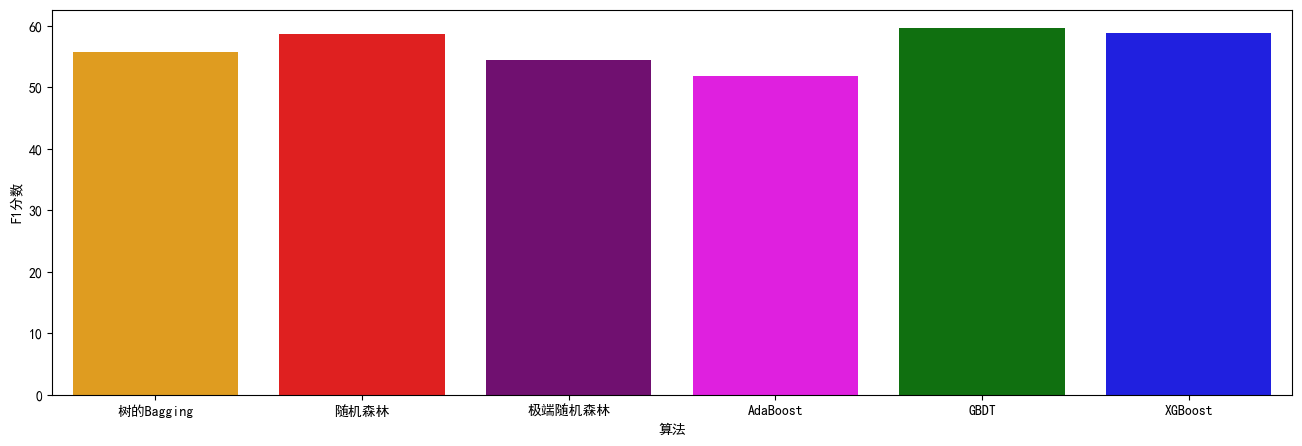

In [23]:
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# plt.rcParams["font.family"]=['SimHei']
methods = ["树的Bagging", "随机森林", "极端随机森林",
"AdaBoost", "GBDT", "XGBoost"]
f1 = [f1_bdt, f1_rf, f1_ext, f1_ada, f1_gb, f1_xgb]
colors = ["orange", "red", "purple", "magenta", "green", "blue"]
# sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("F1分数")
plt.xlabel("算法")
sns.barplot(x=methods, y=f1, palette=colors)
# plt.grid(b=None)
plt.show()

这段代码使用Python绘图库Matplotlib和Seaborn创建了一个柱状图，用于可视化不同集成学习方法的F1分数。每种方法的F1分数都存储在名为`f1`的列表中。以下是代码的详细解释：

1. 注释的部分是设置字体和显示参数的代码，以便在图形中显示中文字符。在此我们省略这部分。

2. 定义集成学习方法的列表和对应的F1分数列表：
```python
methods = ["树的Bagging", "随机森林", "极端随机森林", "AdaBoost", "GBDT", "XGBoost"]
f1 = [f1_bdt, f1_rf, f1_ext, f1_ada, f1_gb, f1_xgb]
colors = ["orange", "red", "purple", "magenta", "green", "blue"]
```
在这里，`methods`是包含6种集成学习方法名称的列表，`f1`包含了这些方法对应的F1分数，`colors`是每种方法对应的颜色。

3. 设置绘图参数并创建柱状图：
```python
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("F1分数")
plt.xlabel("算法")
sns.barplot(x=methods, y=f1, palette=colors)
plt.show()
```
首先，设置图形大小为16x5。接着，设置y轴刻度范围和刻度间隔（从0到100，间隔为10）。然后，设置y轴和x轴的标签。最后，使用Seaborn库的`barplot`函数绘制柱状图，设置x轴的数据为`methods`，y轴的数据为`f1`，并为每种方法分配颜色。图形将展示不同集成学习算法的F1分数，以便于比较它们的性能。

4. 执行`plt.show()`命令将图形显示出来。这将生成一个包含6个柱状图的图形，颜色分别对应于不同的集成学习方法。通过观察图形，我们可以对比这些方法的F1分数，从而选择性能最佳的方法。